In [5]:
# Importing the necessary libraries
import pandas as pd

# Loading the dataset
dataset = pd.read_csv("C:/Users/LENOVO/Downloads/SampleSuperstore.csv")

# Displaying the first rows of the dataset to understand its structure
print("The first rows of the dataset: :")
print(dataset.head())

# Viewing information about the dataset to understand its characteristics
print("\nInformation about the dataset :")
dataset.info()




The first rows of the dataset: :
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00

In [6]:
# Statistical summary of the dataset to get an overview of the numerical values
print("\nStatistical summary of the dataset :")
dataset.describe()


Statistical summary of the dataset :


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


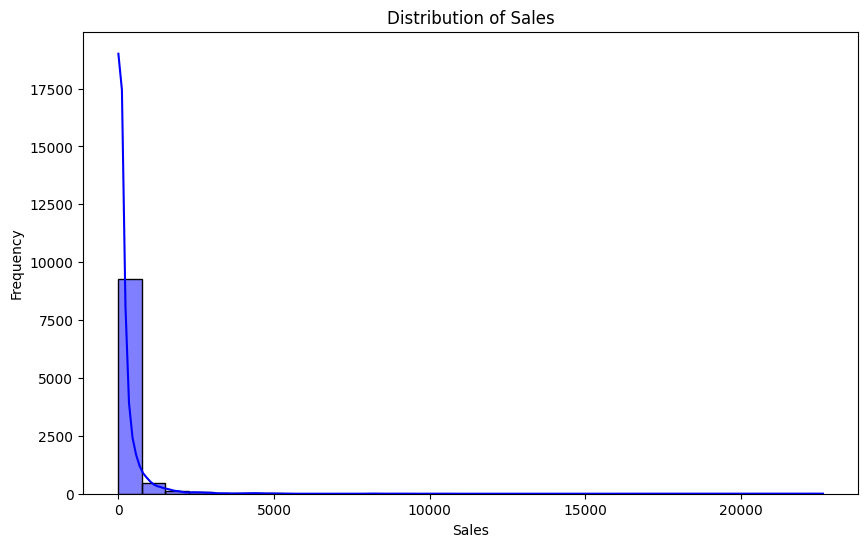

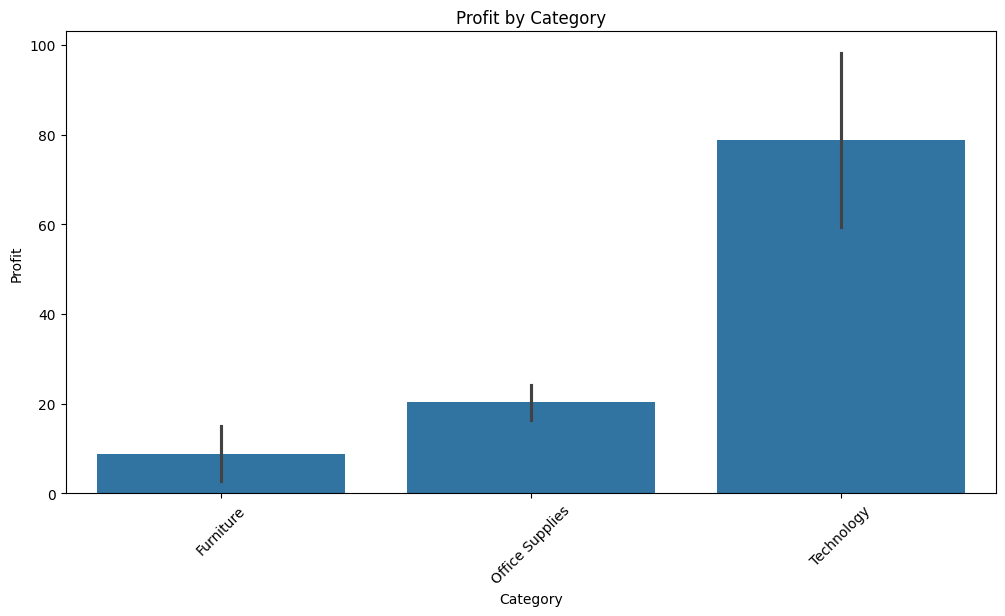

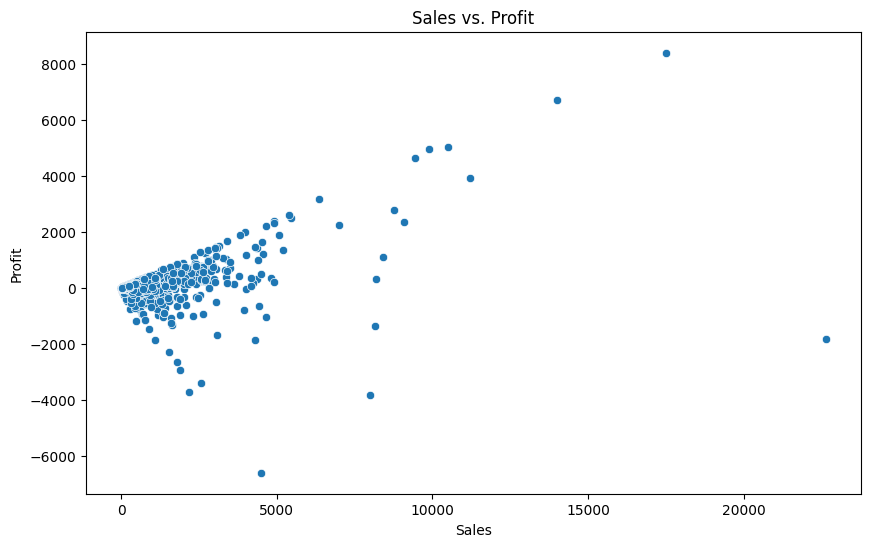

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing data to identify trends and patterns
# Histogram for sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Bar chart for product categories and profits
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=dataset)
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for sales vs. profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=dataset)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [8]:
# Grouping data by category and calculating mean profit
category_profit = dataset.groupby('Category')['Profit'].mean().sort_values()

# Grouping data by region and calculating mean profit
region_profit = dataset.groupby('Region')['Profit'].mean().sort_values()

# Grouping data by sub-category and calculating mean profit
subcategory_profit = dataset.groupby('Sub-Category')['Profit'].mean().sort_values()

# Identifying categories, regions, and sub-categories with the least profit
least_profitable_category = category_profit.head(1).index[0]
least_profitable_region = region_profit.head(1).index[0]
least_profitable_subcategory = subcategory_profit.head(1).index[0]

# Displaying the results
print("Least Profitable Category:", least_profitable_category)
print("Least Profitable Region:", least_profitable_region)
print("Least Profitable Sub-Category:", least_profitable_subcategory)

Least Profitable Category: Furniture
Least Profitable Region: Central
Least Profitable Sub-Category: Tables


In [9]:
# Calculating correlation matrix
correlation_matrix = dataset[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Displaying correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


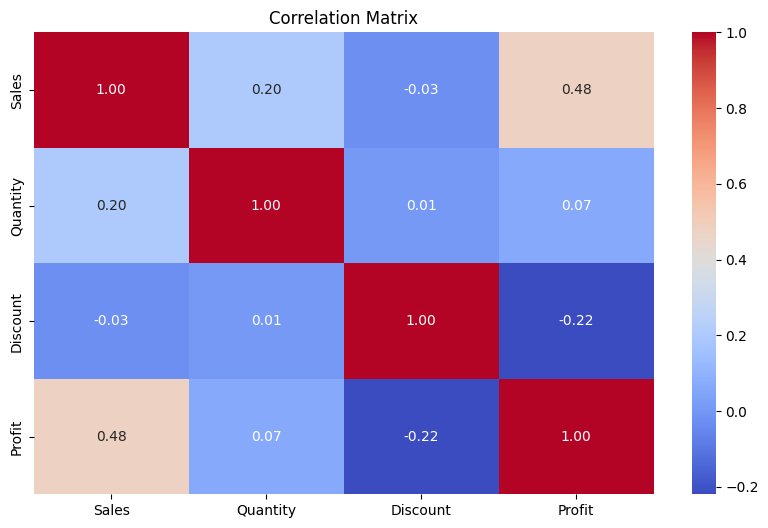

In [10]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Grouping data by product category and calculating total sales and profit
category_sales_profit = dataset.groupby('Category').agg(Sales{'': 'sum', 'Profit': 'sum'}).sort_values(by='Sales')

# Grouping data by sub-category and calculating total sales and profit
subcategory_sales_profit = dataset.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales')

# Identifying the least sold or least profitable categories and sub-categories
least_sold_category = category_sales_profit.head(1).index[0]
least_profitable_category = category_sales_profit.sort_values(by='Profit').head(1).index[0]

least_sold_subcategory = subcategory_sales_profit.head(1).index[0]
least_profitable_subcategory = subcategory_sales_profit.sort_values(by='Profit').head(1).index[0]

# Displaying the results
print("Least Sold Category:", least_sold_category)
print("Least Profitable Category:", least_profitable_category)

print("Least Sold Sub-Category:", least_sold_subcategory)
print("Least Profitable Sub-Category:", least_profitable_subcategory)

Least Sold Category: Office Supplies
Least Profitable Category: Furniture
Least Sold Sub-Category: Fasteners
Least Profitable Sub-Category: Tables


 Interpretation of Results

 Least Profitable Areas
1. Least Profitable Category: Furniture
   - Insight: The Furniture category has the lowest average profit. This might be due to high costs, low sales prices, or high discounts offered on these items. It suggests that this category is not as efficient in generating profit compared to others.

2. Least Profitable Region: Central
   - Insight: The Central region has the lowest average profit among all regions. This could indicate that the products in this region are either not selling well, being sold at lower prices, or incurring higher costs.

3. Least Profitable Sub-Category: Tables
   - Insight: Within the Furniture category, the Tables sub-category has the lowest average profit. This points to a specific problem area within the broader category of Furniture.

 Correlation Matrix
- Sales and Profit (0.479)
  - Insight: There is a moderate positive correlation between sales and profit, indicating that higher sales tend to be associated with higher profits. However, the correlation is not extremely strong, suggesting that other factors also play a significant role in determining profit.
  
- Quantity and Profit (0.066)
  - Insight: The correlation between quantity sold and profit is very weak. This indicates that simply selling more units does not necessarily lead to higher profits, possibly due to varying profit margins across different products.
  
- Discount and Profit (-0.219)
  - Insight: There is a negative correlation between discount and profit, which is expected as higher discounts reduce profit margins. This suggests that excessive discounting is detrimental to profitability.

 Least Sold Areas
1. Least Sold Category: Office Supplies
   - Insight: Despite being the least sold category, Office Supplies may still be profitable if the margins are high. However, the low sales volume indicates potential areas for increasing market penetration or improving marketing strategies.
   
2. Least Sold Sub-Category: Fasteners
   - Insight: Fasteners are the least sold sub-category. Similar to Office Supplies, this could be an opportunity to explore why sales are low and what can be done to increase them.

 Overall Interpretation
- Furniture: The Furniture category, particularly Tables, is the weakest area in terms of profitability. This could be due to high production or shipping costs, lower sales prices, or heavy discounting. Focusing on cost reduction, price optimization, and marketing strategies might help improve profitability in this category.

- Central Region: The Central region's poor performance suggests a need to review market strategies, pricing, and cost structures specific to this region. It might also be beneficial to conduct market research to understand customer preferences and demand in this area.

- Discounting: The negative correlation between discount and profit indicates that reducing discounts could help improve overall profitability. Evaluating the effectiveness of discount strategies and finding a balance that attracts customers without eroding profits is crucial.

- Sales and Quantity: The weak correlation between quantity sold and profit suggests that simply increasing sales volume is not sufficient. Emphasizing high-margin products and optimizing the product mix could be more effective strategies.

 Recommendations
1. Review and Optimize Pricing: Reevaluate the pricing strategy for the Furniture category, especially for Tables. Consider whether prices can be adjusted without significantly affecting sales volume.

2. Cost Reduction: Look into ways to reduce costs associated with producing and delivering Furniture, particularly in the Central region.

3. Discount Strategy: Reassess discount policies to find a balance that attracts customers but maintains healthy profit margins.

4. Marketing and Sales Strategies: Implement targeted marketing campaigns to boost sales in the Office Supplies category and the Central region. Explore why Fasteners have low sales and address any issues.

5. Product Mix: Focus on promoting and selling higher-margin products. Ensure that sales efforts are aligned with the products that contribute the most to profitability.

By addressing these weak areas and implementing these strategies, the business can potentially improve its overall profitability.